## Installing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Datasets

In [3]:
deliveries= pd.read_csv("/workspaces/projects/Team_Winning_Chances_End_to_End/Data/deliveries.csv")
matches=pd.read_csv("/workspaces/projects/Team_Winning_Chances_End_to_End/Data/matches.csv")

#### Pre Inspection

In [4]:
matches = matches.rename(columns={
    'id': 'ID',
    'season': 'Season',
    'city': 'City',
    'date': 'Date',
    'player_of_match': 'Player_of_Match',
    'venue': 'Venue',
    'team1': 'Team1',
    'team2': 'Team2',
    'toss_winner': 'TossWinner',
    'toss_decision': 'TossDecision',
    'winner': 'WinningTeam',
    'result': 'WonBy',
    'result_margin': 'Margin',
    'super_over': 'SuperOver',
    'method': 'method',
    'umpire1': 'Umpire1',
    'umpire2': 'Umpire2'
})
matches.head()

,ID,Season,City,Date,match_type,Player_of_Match,Venue,Team1,Team2,TossWinner,TossDecision,WinningTeam,WonBy,Margin,target_runs,target_overs,SuperOver,method,Umpire1,Umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [6]:
deliveries = deliveries.rename(columns={
    'match_id': 'ID',
    'inning': 'innings',
    'batting_team': 'BattingTeam',
    'bowling_team': 'BowlingTeam',
    'over': 'overs',
    'ball': 'ballnumber',
    'batsman_runs': 'batsman_run',
    'extra_runs': 'extras_run',
    'total_runs': 'total_run',
    'extras_type': 'extra_type',
    'is_wicket': 'isWicketDelivery',
    'player_dismissed': 'player_out',
    'dismissal_kind': 'kind',
    'fileder': 'fielders_involved'
})

#### Adding total score column in Matches df

In [7]:
total_score_df= deliveries.groupby(['ID','innings']).sum()['total_run'].reset_index()

In [8]:
team1_score_df=total_score_df[total_score_df['innings']==1]
team2_score_df=total_score_df[total_score_df['innings']==2]

In [9]:
team1_score_df.rename(columns={'total_run': 'team1_runs'}, inplace=True)
team2_score_df.rename(columns={'total_run': 'team2_runs'}, inplace=True)

/tmp/ipykernel_12471/2836941195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1_score_df.rename(columns={'total_run': 'team1_runs'}, inplace=True)
/tmp/ipykernel_12471/2836941195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team2_score_df.rename(columns={'total_run': 'team2_runs'}, inplace=True)


In [10]:
matches=matches.merge(team2_score_df[['ID','team2_runs']],on='ID')
matches=matches.merge(team1_score_df[['ID','team1_runs']],on='ID')

In [11]:
matches

,ID,Season,City,Date,match_type,Player_of_Match,Venue,Team1,Team2,TossWinner,...,WonBy,Margin,target_runs,target_overs,SuperOver,method,Umpire1,Umpire2,team2_runs,team1_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,82,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,207,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,132,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,166,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,112,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,215,214
1088,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,164,159
1089,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,174,172
1090,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,139,175


#### Editing Team names to latest ones

In [12]:
matches['Team1'].unique().tolist()

['Royal Challengers Bangalore',
 'Kings XI Punjab',
 'Delhi Daredevils',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Deccan Chargers',
 'Chennai Super Kings',
 'Kochi Tuskers Kerala',
 'Pune Warriors',
 'Sunrisers Hyderabad',
 'Gujarat Lions',
 'Rising Pune Supergiants',
 'Rising Pune Supergiant',
 'Delhi Capitals',
 'Punjab Kings',
 'Lucknow Super Giants',
 'Gujarat Titans',
 'Royal Challengers Bengaluru']

In [13]:
teams=['Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Chennai Super Kings',
 'Gujarat Titans',
 'Lucknow Super Giants',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Mumbai Indians']

In [14]:
matches['Team1']= matches['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
matches['Team2']= matches['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')
matches['Team1']= matches['Team1'].str.replace('Kings XI Punjab','Punjab Kings')
matches['Team2']= matches['Team2'].str.replace('Kings XI Punjab','Punjab Kings')
matches['Team1']= matches['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches['Team2']= matches['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches['Team1']= matches['Team1'].str.replace('Royal Challengers Bengaluru','Royal Challengers Bangalore')
matches['Team2']= matches['Team2'].str.replace('Royal Challengers Bengaluru','Royal Challengers Bangalore')
deliveries['BattingTeam'] = deliveries['BattingTeam'].replace({
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore'
})

In [15]:
matches=matches[matches['Team1'].isin(teams)]
matches=matches[matches['Team2'].isin(teams)]
deliveries=deliveries[deliveries['BattingTeam'].isin(teams)]

#### Handling Missing Values in Matches df

In [16]:
matches.isnull().sum()

ID                   0
Season               0
City                51
Date                 0
match_type           0
Player_of_Match      2
Venue                0
Team1                0
Team2                0
TossWinner           0
TossDecision         0
WinningTeam          2
WonBy                0
Margin              15
target_runs          0
target_overs         0
SuperOver            0
method             961
Umpire1              0
Umpire2              0
team2_runs           0
team1_runs           0
dtype: int64

In [17]:
matches['City'] = matches.apply(lambda row: row['Venue'].split()[0] if pd.isnull(row['City']) else row['City'], axis=1)

In [18]:
matches[matches['SuperOver'].isnull()]

,ID,Season,City,Date,match_type,Player_of_Match,Venue,Team1,Team2,TossWinner,...,WonBy,Margin,target_runs,target_overs,SuperOver,method,Umpire1,Umpire2,team2_runs,team1_runs


In [19]:
matches.dropna(subset=['SuperOver'], inplace=True)

In [20]:
matches['Margin'].fillna(0, inplace=True)

/tmp/ipykernel_12471/2118410910.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['Margin'].fillna(0, inplace=True)


In [21]:
matches['method'].fillna('No', inplace=True)

/tmp/ipykernel_12471/894305547.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['method'].fillna('No', inplace=True)


In [22]:
matches

,ID,Season,City,Date,match_type,Player_of_Match,Venue,Team1,Team2,TossWinner,...,WonBy,Margin,target_runs,target_overs,SuperOver,method,Umpire1,Umpire2,team2_runs,team1_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,No,Asad Rauf,RE Koertzen,82,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,No,MR Benson,SL Shastri,207,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,No,Aleem Dar,GA Pratapkumar,132,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,No,SJ Davis,DJ Harper,166,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,No,BF Bowden,K Hariharan,112,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,No,Nitin Menon,VK Sharma,215,214
1088,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,No,AK Chaudhary,R Pandit,164,159
1089,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,No,KN Ananthapadmanabhan,MV Saidharshan Kumar,174,172
1090,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,No,Nitin Menon,VK Sharma,139,175


In [23]:
filtered_matches=matches

In [24]:
new_del = deliveries.merge(matches,on='ID')
new_del.columns

Index(['ID', 'innings', 'BattingTeam', 'BowlingTeam', 'overs', 'ballnumber',
       'batter', 'bowler', 'non_striker', 'batsman_run', 'extras_run',
       'total_run', 'extra_type', 'isWicketDelivery', 'player_out', 'kind',
       'fielder', 'Season', 'City', 'Date', 'match_type', 'Player_of_Match',
       'Venue', 'Team1', 'Team2', 'TossWinner', 'TossDecision', 'WinningTeam',
       'WonBy', 'Margin', 'target_runs', 'target_overs', 'SuperOver', 'method',
       'Umpire1', 'Umpire2', 'team2_runs', 'team1_runs'],
      dtype='object')

In [25]:
# Step 1: Full innings-level stats (overall)
venue_innings = new_del.groupby(['ID', 'innings', 'City']).agg(
    total_runs=('total_run', 'sum'),
    total_wickets=('isWicketDelivery', 'sum'),
    total_balls=('ballnumber', 'count')
).reset_index()

venue_innings['overs'] = venue_innings['total_balls'] // 6 + (venue_innings['total_balls'] % 6) / 6
venue_innings['run_rate'] = venue_innings['total_runs'] / venue_innings['overs']
venue_innings['wickets_lost'] = venue_innings['total_wickets']

# Step 2: Powerplay stats (overs < 6)
pp_data = new_del[new_del['overs'] < 6].groupby(['ID', 'innings', 'City']).agg(
    pp_runs=('total_run', 'sum'),
    pp_wickets=('isWicketDelivery', 'sum'),
    pp_balls=('ballnumber', 'count')
).reset_index()

pp_data['pp_overs'] = pp_data['pp_balls'] // 6 + (pp_data['pp_balls'] % 6) / 6
pp_data['pp_run_rate'] = pp_data['pp_runs'] / pp_data['pp_overs']

# Step 3: Merge powerplay with full innings data
venue_innings = venue_innings.merge(pp_data[['ID', 'innings', 'City', 'pp_runs', 'pp_wickets', 'pp_run_rate']], 
                                    on=['ID', 'innings', 'City'], how='left').fillna(0)

# Step 4: Aggregate by City
venue_stats_overall = venue_innings.groupby('City').agg(
    avg_runs=('total_runs', 'mean'),
    avg_wickets=('wickets_lost', 'mean'),
    avg_balls=('total_balls', 'mean'),
    avg_overs=('overs', 'mean'),
    avg_run_rate=('run_rate', 'mean'),
    
    avg_pp_runs=('pp_runs', 'mean'),
    avg_pp_wickets=('pp_wickets', 'mean'),
    avg_pp_run_rate=('pp_run_rate', 'mean'),
    
    innings_count=('ID', 'count')
).reset_index()

# Round for neatness
venue_stats_overall

,City,avg_runs,avg_wickets,avg_balls,avg_overs,avg_run_rate,avg_pp_runs,avg_pp_wickets,avg_pp_run_rate,innings_count
0,Abu Dhabi,145.282051,5.410256,112.807692,18.801282,7.702183,43.179487,1.423077,7.264960,78
1,Ahmedabad,161.040541,5.797297,115.581081,19.263514,8.467399,47.959459,1.472973,7.967955,74
2,Bangalore,152.598214,5.571429,112.821429,18.803571,8.193493,43.955357,1.410714,7.194871,112
3,Bengaluru,180.155172,6.172414,119.258621,19.876437,9.154649,52.310345,1.551724,8.620277,58
4,Bloemfontein,132.250000,6.250000,125.000000,20.833333,6.350433,33.500000,2.250000,5.117156,4
5,Cape Town,112.312500,5.812500,96.187500,16.031250,8.743474,37.125000,1.687500,8.172761,16
6,Centurion,152.208333,5.541667,119.416667,19.902778,7.667349,45.250000,1.625000,7.151452,24
7,Chandigarh,163.763636,5.709091,118.763636,19.793939,8.271083,49.281818,1.381818,7.951862,110
8,Chennai,153.885542,5.861446,118.807229,19.801205,7.820698,47.222892,1.295181,7.797303,166
9,Cuttack,159.916667,5.916667,120.750000,20.125000,7.938529,44.083333,1.416667,7.081929,12


In [26]:
# 1. Calculate basic bowler statistics
bowler_stats = new_del.groupby('bowler').agg(
    total_matches=('ID', 'nunique'),
    total_balls=('ballnumber', 'count'),
    total_runs_conceded=('total_run', 'sum'),
    total_wickets=('isWicketDelivery', 'sum'),
    total_maidens=('total_run', lambda x: (x == 0).sum()),  # Maidens (overs with 0 runs)
    dot_balls=('batsman_run', lambda x: (x == 0).sum())     # Dot balls
).reset_index()

# 2. Calculate more advanced metrics
bowler_stats['overs_bowled'] = bowler_stats['total_balls'] / 6
bowler_stats['bowling_average'] = bowler_stats['total_runs_conceded'] / bowler_stats['total_wickets'].replace(0, 1)
bowler_stats['economy_rate'] = bowler_stats['total_runs_conceded'] / bowler_stats['overs_bowled']
bowler_stats['strike_rate'] = bowler_stats['total_balls'] / bowler_stats['total_wickets'].replace(0, 1)
bowler_stats['dot_percentage'] = (bowler_stats['dot_balls'] / bowler_stats['total_balls']) * 100

# 3. Calculate boundary concession stats
boundary_stats = new_del[new_del['batsman_run'].isin([4,6])].groupby('bowler').agg(
    fours_conceded=('batsman_run', lambda x: (x == 4).sum()),
    sixes_conceded=('batsman_run', lambda x: (x == 6).sum())
).reset_index()

bowler_stats = bowler_stats.merge(boundary_stats, on='bowler', how='left').fillna(0)

# 4. Calculate phase-wise statistics (Powerplay, Middle, Death)
powerplay_stats = new_del[new_del['overs'] < 6].groupby('bowler').agg(
    pp_wickets=('isWicketDelivery', 'sum'),
    pp_economy=('total_run', lambda x: x.sum() / (len(x)/6))
).reset_index()

middle_stats = new_del[(new_del['overs'] >= 6) & (new_del['overs'] < 16)].groupby('bowler').agg(
    middle_wickets=('isWicketDelivery', 'sum'),
    middle_economy=('total_run', lambda x: x.sum() / (len(x)/6))
).reset_index()

death_stats = new_del[new_del['overs'] >= 16].groupby('bowler').agg(
    death_wickets=('isWicketDelivery', 'sum'),
    death_economy=('total_run', lambda x: x.sum() / (len(x)/6))
).reset_index()

# Merge phase-wise stats
bowler_stats = bowler_stats.merge(powerplay_stats, on='bowler', how='left').fillna(0)
bowler_stats = bowler_stats.merge(middle_stats, on='bowler', how='left').fillna(0)
bowler_stats = bowler_stats.merge(death_stats, on='bowler', how='left').fillna(0)

# 7. Round numerical values
numerical_cols = bowler_stats.select_dtypes(include=['float64']).columns
bowler_stats[numerical_cols] = bowler_stats[numerical_cols].round(2)

recent_bowling = new_del.groupby('bowler').tail(30).groupby('bowler').agg(
    recent_runs=('total_run', 'sum'),
    recent_balls=('ballnumber', 'count'),
    recent_wickets=('isWicketDelivery', 'sum')
).reset_index()
recent_bowling['recent_economy'] = (recent_bowling['recent_runs'] / recent_bowling['recent_balls']) * 6

bowler_stats = bowler_stats.merge(recent_bowling, on='bowler', how='left').fillna(0)

bowler_stats.columns

Index(['bowler', 'total_matches', 'total_balls', 'total_runs_conceded',
       'total_wickets', 'total_maidens', 'dot_balls', 'overs_bowled',
       'bowling_average', 'economy_rate', 'strike_rate', 'dot_percentage',
       'fours_conceded', 'sixes_conceded', 'pp_wickets', 'pp_economy',
       'middle_wickets', 'middle_economy', 'death_wickets', 'death_economy',
       'recent_runs', 'recent_balls', 'recent_wickets', 'recent_economy'],
      dtype='object')

In [27]:

# 1. Basic Batting Stats
batter_stats = new_del.groupby('batter').agg(
    total_matches=('ID', 'nunique'),
    total_innings=('innings', 'nunique'),
    total_runs=('batsman_run', 'sum'),
    total_balls_faced=('ballnumber', 'count'),
    total_wickets=('isWicketDelivery', 'sum'),
    total_dot_balls=('batsman_run', lambda x: (x == 0).sum()),
    total_4s=('batsman_run', lambda x: (x == 4).sum()),
    total_6s=('batsman_run', lambda x: (x == 6).sum()),
    highest_score=('batsman_run', 'max')
).reset_index()

# 2. Derived Metrics
batter_stats['batting_avg'] = batter_stats['total_runs'] / batter_stats['total_wickets'].replace(0, 1)
batter_stats['strike_rate'] = (batter_stats['total_runs'] / batter_stats['total_balls_faced']) * 100
batter_stats['boundary_percentage'] = ((batter_stats['total_4s'] + batter_stats['total_6s']) / batter_stats['total_balls_faced']) * 100
batter_stats['dot_ball_percentage'] = (batter_stats['total_dot_balls'] / batter_stats['total_balls_faced']) * 100
batter_stats['runs_per_innings'] = batter_stats['total_runs'] / batter_stats['total_innings']

# 3. Phase-wise Performance (Powerplay, Middle, Death)
powerplay = new_del[new_del['overs'] < 6].groupby('batter').agg(
    pp_runs=('batsman_run', 'sum'),
    pp_balls=('ballnumber', 'count'),
    pp_wickets=('isWicketDelivery', 'sum')
).reset_index()
powerplay['pp_sr'] = (powerplay['pp_runs'] / powerplay['pp_balls']) * 100

middle = new_del[(new_del['overs'] >= 6) & (new_del['overs'] < 16)].groupby('batter').agg(
    middle_runs=('batsman_run', 'sum'),
    middle_balls=('ballnumber', 'count'),
    middle_wickets=('isWicketDelivery', 'sum')
).reset_index()
middle['middle_sr'] = (middle['middle_runs'] / middle['middle_balls']) * 100

death = new_del[new_del['overs'] >= 16].groupby('batter').agg(
    death_runs=('batsman_run', 'sum'),
    death_balls=('ballnumber', 'count'),
    death_wickets=('isWicketDelivery', 'sum')
).reset_index()
death['death_sr'] = (death['death_runs'] / death['death_balls']) * 100

# Merge phase-wise stats
batter_stats = batter_stats.merge(powerplay, on='batter', how='left').fillna(0)
batter_stats = batter_stats.merge(middle, on='batter', how='left').fillna(0)
batter_stats = batter_stats.merge(death, on='batter', how='left').fillna(0)


team_matchup = new_del.groupby(['batter', 'BowlingTeam']).agg(
    runs_vs_team=('batsman_run', 'sum'),
    balls_vs_team=('ballnumber', 'count'),
    wickets_vs_team=('isWicketDelivery', 'sum')
).reset_index()
team_matchup['sr_vs_team'] = (team_matchup['runs_vs_team'] / team_matchup['balls_vs_team']) * 100



# 7. Recent Form (Last 5/10 Matches)
new_del_sorted = new_del.sort_values(['batter', 'Date'])
recent_form = new_del_sorted.groupby('batter').tail(30).groupby('batter').agg(  # Last 30 balls (adjust as needed)
    recent_runs=('batsman_run', 'sum'),
    recent_balls=('ballnumber', 'count'),
    recent_wickets=('isWicketDelivery', 'sum')
).reset_index()
recent_form['recent_sr'] = (recent_form['recent_runs'] / recent_form['recent_balls']) * 100

batter_stats = batter_stats.merge(recent_form, on='batter', how='left').fillna(0)

# 8. Rounding Numerical Columns
numerical_cols = batter_stats.select_dtypes(include=['float64']).columns
batter_stats[numerical_cols] = batter_stats[numerical_cols].round(2)
batter_stats.head()

,batter,total_matches,total_innings,total_runs,total_balls_faced,total_wickets,total_dot_balls,total_4s,total_6s,highest_score,...,middle_wickets,middle_sr,death_runs,death_balls,death_wickets,death_sr,recent_runs,recent_balls,recent_wickets,recent_sr
0,A Ashish Reddy,21,2,254,177,15,59,15,14,6,...,3.0,140.35,169.0,113.0,11.0,149.56,47,30,2,156.67
1,A Badoni,34,2,575,470,26,173,44,20,6,...,9.0,112.82,293.0,198.0,14.0,147.98,48,30,1,160.00
2,A Chandila,2,1,4,7,1,3,0,0,1,...,0.0,0.00,4.0,7.0,1.0,57.14,4,7,1,57.14
3,A Chopra,6,2,53,75,5,45,7,0,4,...,3.0,76.47,0.0,0.0,0.0,0.00,18,30,3,60.00
4,A Choudhary,2,1,10,8,2,3,0,1,6,...,0.0,0.00,10.0,8.0,2.0,125.00,10,8,2,125.00


In [28]:
# Get first 6 unique bowlers per innings (by appearance order)
top6_bowlers = (
    new_del.sort_values(['ID', 'innings', 'ballnumber'])
    .groupby(['ID', 'innings', 'bowler']).head(1)
    .groupby(['ID', 'innings']).head(6)[['ID', 'innings', 'bowler']]
)

# Merge with ALL relevant bowler stats
top6_bowler_stats = top6_bowlers.merge(
    bowler_stats[[
        'bowler', 'total_matches', 'total_balls', 'total_runs_conceded',
        'total_wickets', 'total_maidens', 'dot_balls', 'overs_bowled',
        'bowling_average', 'economy_rate', 'strike_rate', 'dot_percentage',
        'fours_conceded', 'sixes_conceded',
        'pp_wickets', 'pp_economy',
        'middle_wickets', 'middle_economy',
        'death_wickets', 'death_economy',
        'recent_runs', 'recent_balls', 'recent_wickets', 'recent_economy'
    ]],
    on='bowler',
    how='left'
)

top6_bowling_team_stats = top6_bowler_stats.groupby(['ID', 'innings']).agg(
    # Basic metrics (averages)
    top6_avg_matches=('total_matches', 'mean'),
    top6_avg_balls_bowled=('total_balls', 'mean'),
    top6_avg_runs_conceded=('total_runs_conceded', 'mean'),
    top6_avg_wickets=('total_wickets', 'mean'),
    top6_avg_maidens=('total_maidens', 'mean'),
    top6_avg_dot_pct=('dot_percentage', 'mean'),
    
    # Efficiency metrics (averages)
    top6_avg_bowling_avg=('bowling_average', 'mean'),
    top6_avg_economy=('economy_rate', 'mean'),
    top6_avg_strike_rate=('strike_rate', 'mean'),
    top6_avg_fours_conceded=('fours_conceded', 'mean'),
    top6_avg_sixes_conceded=('sixes_conceded', 'mean'),
    
    # Phase-wise (averages)
    top6_avg_pp_wkts=('pp_wickets', 'mean'),
    top6_avg_pp_eco=('pp_economy', 'mean'),
    top6_avg_middle_wkts=('middle_wickets', 'mean'),
    top6_avg_middle_eco=('middle_economy', 'mean'),
    top6_avg_death_wkts=('death_wickets', 'mean'),
    top6_avg_death_eco=('death_economy', 'mean'),
    
    # Recent form (averages)
    top6_avg_recent_runs=('recent_runs', 'mean'),
    top6_avg_recent_balls=('recent_balls', 'mean'),
    top6_avg_recent_wickets=('recent_wickets', 'mean'),
    top6_avg_recent_economy=('recent_economy', 'mean'),
    
    # Count of bowlers in top 6
    top6_bowler_count=('bowler', 'count')
).reset_index()

top6_bowling_team_stats.head()

,ID,innings,top6_avg_matches,top6_avg_balls_bowled,top6_avg_runs_conceded,top6_avg_wickets,top6_avg_maidens,top6_avg_dot_pct,top6_avg_bowling_avg,top6_avg_economy,...,top6_avg_pp_eco,top6_avg_middle_wkts,top6_avg_middle_eco,top6_avg_death_wkts,top6_avg_death_eco,top6_avg_recent_runs,top6_avg_recent_balls,top6_avg_recent_wickets,top6_avg_recent_economy,top6_bowler_count
0,335982,1,45.500000,984.000000,1263.333333,43.000000,370.500000,35.950,49.341667,9.060000,...,6.698333,10.500000,8.618333,15.666667,9.891667,49.666667,29.166667,1.0,10.206667,6
1,335982,2,45.000000,878.800000,1184.000000,36.200000,327.200000,40.618,31.396000,8.050000,...,9.036000,11.800000,7.670000,8.800000,7.974000,51.200000,30.000000,0.8,10.240000,5
2,335983,1,60.666667,1254.333333,1656.000000,60.166667,457.166667,40.455,41.571667,8.133333,...,6.290000,31.666667,7.873333,14.500000,8.495000,41.666667,30.000000,1.0,8.333333,6
3,335983,2,26.600000,580.000000,753.600000,26.000000,205.800000,36.358,30.726000,8.792000,...,9.174000,15.600000,8.390000,5.600000,12.102000,46.600000,30.000000,0.8,9.320000,5
4,335984,1,27.600000,561.800000,684.000000,29.600000,182.400000,38.876,27.714000,7.904000,...,8.704000,18.000000,7.570000,7.200000,7.284000,49.200000,30.000000,0.4,9.840000,5


In [29]:
# Get first 6 unique batters per innings (by appearance order)
top6_batters = (
    new_del.sort_values(['ID', 'innings', 'ballnumber'])
    .groupby(['ID', 'innings', 'batter']).head(1)
    .groupby(['ID', 'innings']).head(6)[['ID', 'innings', 'batter']]
)

# Merge with ALL relevant batter stats
top6_stats = top6_batters.merge(
    batter_stats[[
        'batter', 'total_matches', 'total_balls_faced', 'boundary_percentage', 
        'dot_ball_percentage', 'pp_runs', 'pp_wickets', 'pp_sr',
        'death_runs', 'death_wickets', 'death_sr',
        'recent_runs', 'recent_wickets', 'recent_sr'
    ]],
    on='batter',
    how='left'
)

# Corrected aggregation for top 6 batter averages
top6_team_stats = top6_stats.groupby(['ID', 'innings']).agg(
    # Basic metrics (averages)
    top6_avg_matches=('total_matches', 'mean'),
    top6_avg_balls_faced=('total_balls_faced', 'mean'),
    top6_avg_boundary_pct=('boundary_percentage', 'mean'),
    top6_avg_dot_pct=('dot_ball_percentage', 'mean'),
    
    # Powerplay phase (averages)
    top6_avg_pp_runs=('pp_runs', 'mean'),
    top6_avg_pp_wickets=('pp_wickets', 'mean'),
    top6_avg_pp_sr=('pp_sr', 'mean'),
    
    # Death overs phase (averages)
    top6_avg_death_runs=('death_runs', 'mean'),
    top6_avg_death_wickets=('death_wickets', 'mean'),
    top6_avg_death_sr=('death_sr', 'mean'),
    
    # Recent form (averages)
    top6_avg_recent_runs=('recent_runs', 'mean'),
    top6_avg_recent_wickets=('recent_wickets', 'mean'),
    top6_avg_recent_sr=('recent_sr', 'mean'),
    
    # Count of actual top-order batters (should be 6 unless all out earlier)
    top6_count=('batter', 'count')
).reset_index()

top6_team_stats.head()

,ID,innings,top6_avg_matches,top6_avg_balls_faced,top6_avg_boundary_pct,top6_avg_dot_pct,top6_avg_pp_runs,top6_avg_pp_wickets,top6_avg_pp_sr,top6_avg_death_runs,top6_avg_death_wickets,top6_avg_death_sr,top6_avg_recent_runs,top6_avg_recent_wickets,top6_avg_recent_sr,top6_count
0,335982,1,35.600000,723.400000,12.392000,49.728000,294.200000,13.000000,91.782000,101.600000,4.800000,135.692000,29.800000,2.600000,99.332000,5
1,335982,2,74.833333,1740.166667,15.130000,42.310000,753.666667,21.000000,82.478333,275.666667,11.666667,147.440000,35.666667,2.666667,118.890000,6
2,335983,1,93.833333,1871.833333,15.970000,40.451667,707.166667,21.166667,92.260000,547.500000,17.833333,167.150000,37.166667,2.666667,123.890000,6
3,335983,2,45.833333,758.500000,15.543333,43.175000,203.166667,7.833333,115.355000,197.333333,10.333333,134.981667,27.500000,2.833333,91.666667,6
4,335984,1,73.833333,1147.666667,12.581667,46.540000,285.833333,9.333333,71.373333,387.666667,17.666667,127.930000,29.500000,2.333333,101.390000,6


In [30]:
new_del =new_del[new_del['innings']==2]

In [31]:
new_del['current score'] = new_del.groupby('ID')['total_run'].cumsum()
new_del['runs_left']=new_del['team1_runs']-new_del['current score']
new_del['balls_left']= 120-(new_del['overs']*6+new_del['ballnumber'])
new_del = new_del[new_del['method'] == 'No']
new_del.drop('method',axis=1,inplace=True)
new_del['wickets'] = new_del.groupby('ID')['isWicketDelivery'].cumsum()
new_del['wickets_left']=10-new_del['wickets']
new_del.drop('wickets',axis=1,inplace=True)
new_del=new_del[new_del['SuperOver']!='Y']

In [32]:
new_del['crr']=new_del['current score']/((120-new_del['balls_left'])/6)
new_del['rrr']=new_del['runs_left']/(new_del['balls_left']/6)
def result(row):
    return 1 if row['BattingTeam']==row['WinningTeam'] else 0

In [33]:
new_del['results']= new_del.apply(result,axis=1)

In [34]:
fdf= new_del.merge(top6_bowling_team_stats,on=['ID','innings'],how='left')
fdf= fdf.merge(top6_team_stats,on=['ID','innings'],how='left')
fdf= fdf.merge(venue_stats_overall,on='City',how='left')
fdf.head()

,ID,innings,BattingTeam,BowlingTeam,overs,ballnumber,batter,bowler,non_striker,batsman_run,...,top6_count,avg_runs,avg_wickets,avg_balls,avg_overs,avg_run_rate,avg_pp_runs,avg_pp_wickets,avg_pp_run_rate,innings_count
0,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,...,6,152.598214,5.571429,112.821429,18.803571,8.193493,43.955357,1.410714,7.194871,112
1,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,...,6,152.598214,5.571429,112.821429,18.803571,8.193493,43.955357,1.410714,7.194871,112
2,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,...,6,152.598214,5.571429,112.821429,18.803571,8.193493,43.955357,1.410714,7.194871,112
3,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,...,6,152.598214,5.571429,112.821429,18.803571,8.193493,43.955357,1.410714,7.194871,112
4,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,...,6,152.598214,5.571429,112.821429,18.803571,8.193493,43.955357,1.410714,7.194871,112


In [35]:
fdf=fdf[['ID','BattingTeam','Team2','City','runs_left','balls_left','wickets_left','crr','rrr','results','top6_avg_matches_x', 'top6_avg_balls_bowled', 'top6_avg_runs_conceded',
       'top6_avg_wickets', 'top6_avg_maidens', 'top6_avg_dot_pct_x',
       'top6_avg_bowling_avg', 'top6_avg_economy', 'top6_avg_strike_rate',
       'top6_avg_fours_conceded', 'top6_avg_sixes_conceded',
       'top6_avg_pp_wkts', 'top6_avg_pp_eco', 'top6_avg_middle_wkts',
       'top6_avg_middle_eco', 'top6_avg_death_wkts', 'top6_avg_death_eco',
       'top6_avg_recent_runs_x', 'top6_avg_recent_balls',
       'top6_avg_recent_wickets_x', 'top6_avg_recent_economy',
       'top6_bowler_count', 'top6_avg_matches_y', 'top6_avg_balls_faced',
       'top6_avg_boundary_pct', 'top6_avg_dot_pct_y', 'top6_avg_pp_runs',
       'top6_avg_pp_wickets', 'top6_avg_pp_sr', 'top6_avg_death_runs',
       'top6_avg_death_wickets', 'top6_avg_death_sr', 'top6_avg_recent_runs_y',
       'top6_avg_recent_wickets_y', 'top6_avg_recent_sr', 'top6_count',
       'avg_runs', 'avg_wickets', 'avg_balls', 'avg_overs', 'avg_run_rate',
       'avg_pp_runs', 'avg_pp_wickets', 'avg_pp_run_rate', 'innings_count']]

In [46]:
batter_stats.to_csv('batter_stats.csv', index=False)
bowler_stats.to_csv('bowler_stats.csv', index=False)
venue_stats_overall.to_csv('venue_stats_overall.csv', index=False)

In [37]:
fdf = fdf[fdf['balls_left'] >= -1]
fdf = fdf[fdf['runs_left'] >= -1]
fdf = fdf[fdf['rrr'] <= np.inf]
fdf.replace([np.inf, -np.inf], np.nan, inplace=True)
fdf.dropna(inplace=True)

In [39]:
from sklearn.model_selection import train_test_split

# Shuffle the unique IDs
unique_ids = fdf['ID'].unique()
train_ids, test_ids = train_test_split(unique_ids, test_size=0.2, random_state=42)

# Filter the rows based on the split IDs and drop the 'results' and 'ID' columns from the feature sets
X_train = fdf[fdf['ID'].isin(train_ids)].drop(['results', 'ID'], axis=1)
X_test = fdf[fdf['ID'].isin(test_ids)].drop(['results', 'ID'], axis=1)

# Filter the target columns (results), no need to drop 'ID' here
y_train = fdf[fdf['ID'].isin(train_ids)]['results']
y_test = fdf[fdf['ID'].isin(test_ids)]['results']

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [41]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

pipeline = Pipeline([
    ('transformer', transformer),
    ('model', XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, 
                            subsample=0.8, colsample_bytree=0.8, random_state=42))
])

pipeline.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['BattingTeam', 'Team2',
                                                   'City'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=Fa...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [42]:
pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.7816302259628579


In [43]:
pipeline.predict_proba(X_test.sample())

array([[0.9869482 , 0.01305178]], dtype=float32)

In [247]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['ID'] == match_id]# Collecting all data of 1 Match
    match = match[(match['ballnumber'] == 6)]# Filtering onlt the 6th ball
    temp_df = match[['BattingTeam','Team2','City','runs_left','balls_left','wickets_left','crr','rrr','team1_runs']]# Final df with selected columns
    result = pipeline.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,2)#loose percentage
    temp_df['win'] = np.round(result.T[1]*100,2)#win percentage
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['team1_runs'].values[0]# getting target value
    temp_df['current_score']= target-temp_df['runs_left']
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win','current_score','rrr','crr']]
    return temp_df,target

In [248]:
pd.options.mode.chained_assignment = None

In [ ]:
temp_df,target = match_progression(,335990,pipeline)
temp_df

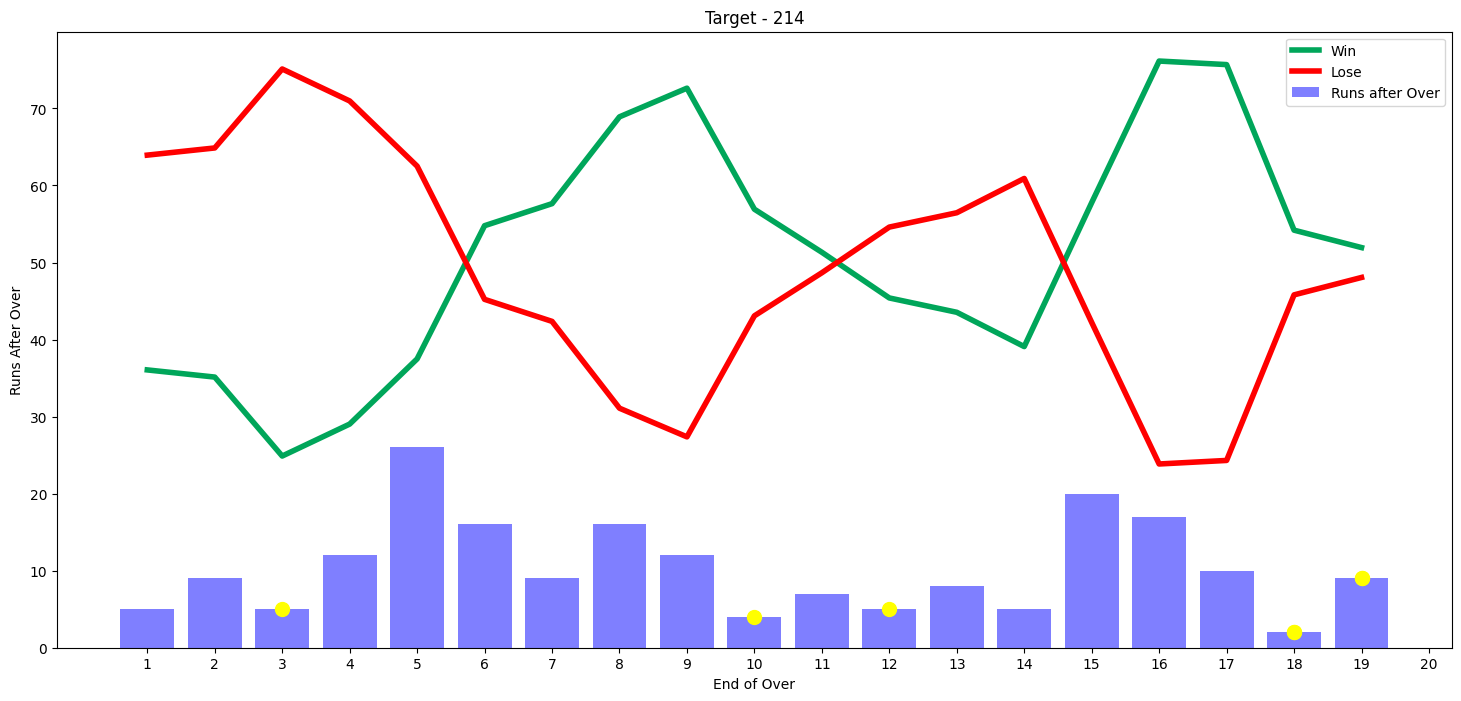

In [56]:
import matplotlib.pyplot as plt

# Assuming temp_df is your DataFrame containing the data

# Your existing code
plt.figure(figsize=(18, 8))
plt.plot(temp_df['end_of_over'], temp_df['win'], color='#00a65a', linewidth=4, label='Win')
plt.plot(temp_df['end_of_over'], temp_df['lose'], color='red', linewidth=4, label='Lose')

# Plotting runs_after_over as a bar plot
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'], color='blue', alpha=0.5, label='Runs after Over')

# Plotting yellow dots for wickets_in_over
for index, row in temp_df.iterrows():
    wickets = int(row['wickets_in_over'])  # Convert to integer
    end_of_over = row['end_of_over']
    plt.scatter([end_of_over] * wickets, [row['runs_after_over']] * wickets, color='yellow', s=100, zorder=5)

# Set x-axis scale from 1 to 20
plt.xticks(range(1, 21))

# Adding labels and title
plt.title('Target - ' + str(target))
plt.xlabel('End of Over')
plt.ylabel('Runs After Over')
plt.legend()
plt.show()

In [44]:
import pickle
pickle.dump(pipeline,open('my_pipeline.pkl','wb'))

In [253]:
import joblib
joblib.dump(pipeline, 'my_pipeline.joblib')
loaded_pipeline = joblib.load('my_pipeline.joblib')

In [5]:
import streamlit as st
import joblib
import pandas as pd
import os
teams = ['Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad',
    'Delhi Capitals',
    'Chennai Super Kings',
    'Gujarat Titans',
    'Lucknow Super Giants',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Mumbai Indians']

cities = ['Ahmedabad',
    'Kolkata',
    'Mumbai',
    'Navi Mumbai',
    'Pune',
    'Dubai',
    'Sharjah',
    'Abu Dhabi',
    'Delhi',
    'Chennai',
    'Hyderabad',
    'Visakhapatnam',
    'Chandigarh',
    'Bengaluru',
    'Jaipur',
    'Indore',
    'Bangalore',
    'Raipur',
    'Ranchi',
    'Cuttack',
    'Dharamsala',
    'Nagpur',
    'Johannesburg',
    'Centurion',
    'Durban',
    'Bloemfontein',
    'Port Elizabeth',
    'Kimberley',
    'East London',
    'Cape Town']

In [489]:
from joblib import dump
dump(pipeline, "new.joblib")

['new.joblib']

In [485]:
file_path = '/workspaces/projects/Team_Winning_Chances_End_to_End/Notebook/my_pipeline.pkl'
with open(file_path, 'rb') as file:
    pipe = joblib.load(file)
print(pipe)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['BattingTeam', 'Team2',
                                                   'City'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=Fa...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
   